# Linear Regression

In [1]:
import numpy as np
import pandas as pd 

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

### function to create directory if not present

In [2]:
import os
def create_dir(directory):
    '''
     It will create directory only if it doesn't exists.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)

In [4]:
from sklearn.datasets import make_regression

<IPython.core.display.Javascript object>


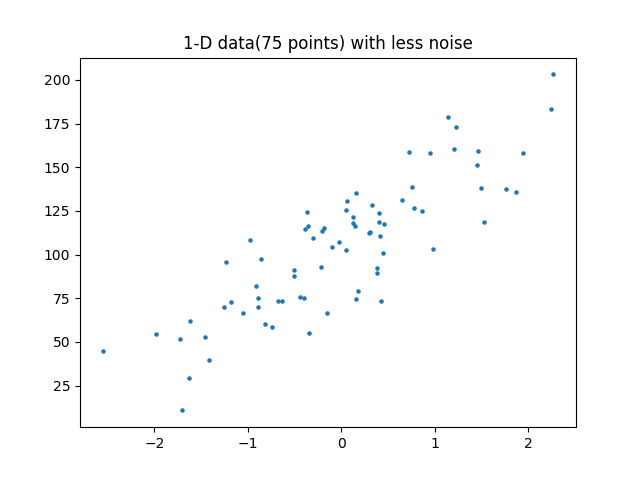

In [5]:
X, y = make_regression(n_samples=75, n_features=1, random_state=0, noise=20, bias=100)
fig = plt.figure()
plt.scatter(X,y,s=5)
plt.title('1-D data(75 points) with less noise')
plt.savefig('1-D data(75 points) with less noise.png')
plt.show()

 # Fit regression line using sklearn

In [6]:
from sklearn import linear_model

In [7]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
y_pred  = reg.predict(X)

In [8]:
print(reg.intercept_, reg.coef_[0])


104.333045187 31.3255563526


<IPython.core.display.Javascript object>


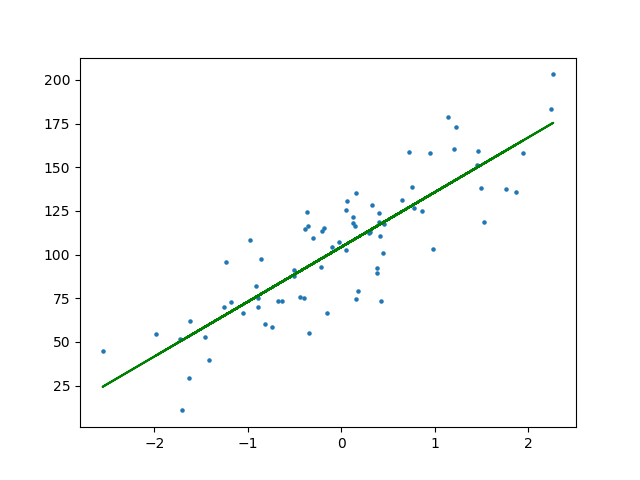

In [187]:
plt.scatter(X, y, s=5)
plt.plot(X,y_pred, c='g')
plt.show()

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

# Let's try to observe How the algorithm got that regression line

Assuming you have basic idea about what Linear Regression is, I am not going to explain it in detail.

- Since we have 1-D data, we can easily fit a line to the data. (We have to predict y given X) 
 - This line is what we call ___' weight vector___' or ' ___hypothesis___'.
 - By using this line (plane in higher dimensional data), we will fit the line with minimum error possible. 
 - After we find the best line for this data, we will predict __y__ given any new __x__.


- Given data is 1-D data. ie., we have only one x and an output for that x. We will try to fit line/plane that is best for all the data points in this dataset.


- Let's say our equation of our line is
 $\boldsymbol{w = w_0+w_1x_1 } \\
     \boldsymbol{w_0 : }y-intercept\\
     \boldsymbol{w_1 : }slope$
    
- After we find the best line for this data, given any new __x__, we will just substitute our data ( x1 in this case), in the equation which is optimised with better $w_0$ and $w_1$ values, predict __y__.

- To make our calculation simpler, we will rewrite the equation as :
$\boldsymbol{w = w_0x_0 + w_1x_1}$, with $\boldsymbol{x_0}$ as always 1.

In [9]:
# creating new numpy array (X - data) with two additional column
x = np.column_stack((np.ones(len(X)), X))

# just making weight vector a proper column vector
y = y.reshape(y.shape[0],1)

print('\n X : {} matrix \n Some rows in X are : \n {} : '.format(x.shape,x[1:5, :]))
print('\n y : {} matrix \n Some rows in y are:  \n {} :'.format(y.shape,y[1:5, :]))


 X : (75, 2) matrix 
 Some rows in X are : 
 [[ 1.          0.40015721]
 [ 1.         -0.51080514]
 [ 1.          0.33367433]
 [ 1.         -1.04855297]] : 

 y : (75, 1) matrix 
 Some rows in y are:  
 [[ 118.41254134]
 [  90.96474113]
 [ 128.40791518]
 [  66.47822888]] :


In [10]:
min_x, min_y, max_x, max_y = min(X)[0], min(y)[0], max(X)[0], max(y)[0]

### Initialize some random weights or coefficients

In [11]:
import random
# random.seed(0)

# w = [w_0, w_1] = [intercept, slope_of_the_line]
# w = np.array([random.randint(-300,300), random.randint(-300,300)]).reshape(2,1)

# assigning weights to 280 and 280 to make it clear in 3d plots
w = np.array([290, 290]).reshape(2,1)
w

array([[290],
       [290]])

In [12]:
 x.shape, w.shape, np.dot(x, w).shape

((75, 2), (2, 1), (75, 1))

### function to calculate mean_squared_error given weights (slope,intercept),  data ( both  X  and  y )

In [13]:
def compute_cost(w, x, y):
    wx = np.dot(x,w)
    error = wx - y
    error_square = np.dot(np.transpose(wx), wx)
    # mean square error
    mse = (1/2) * np.round(error_square/len(x), decimals=3)
    # return just the value in numpy array.., as it contains only one element.
    return float(mse)
print('\n Mean squared error for initial weights : {}'.format(compute_cost(w, x, y)))


 Mean squared error for initial weights : 86503.9805


In [14]:
def create_line(weights, x_values, c='r'):
    intercept, slope = np.array(weights).flatten()
    y_values = intercept + np.array(x_values)*slope
    ln = plt.Line2D(x_values, y_values, c=c)
    return ln

def annotate_cost(cost, ax):
    an = ax.annotate('Cost: '+str(cost), xy=(max_x, min_y), 
                 ha='right', va='center', xytext=(22,5),
                 textcoords='offset points')
    return an
  

### This is how our regression line looks like with random weights ( slope and intercept ).

<IPython.core.display.Javascript object>


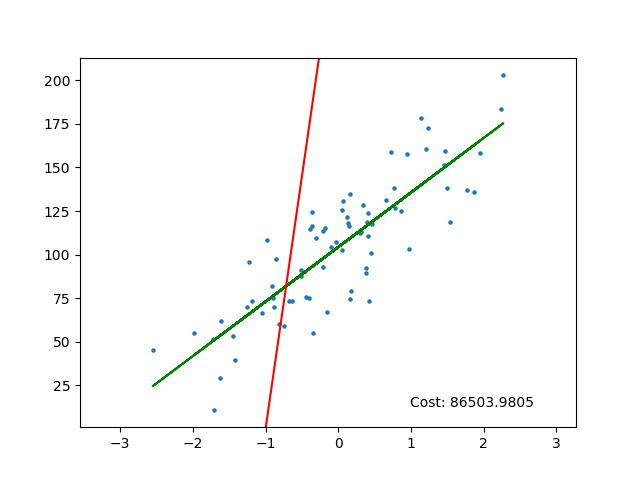

In [15]:
fig, ax = plt.subplots()
ax.scatter(x[:,-1],y,s=5)
ax.set(xlim = [min_x-1, max_x+1],
      ylim = [min_y-10, max_y+10])

# add the line wih slope and intercept
ln = create_line(weights=w,x_values=[min_x, max_x])
ax.add_artist(ln)

# our regression line from sklearn
ax.plot(x[:, -1],y_pred, c='g')

# mean squared error
cost = compute_cost(w,x,y)
an = annotate_cost(cost, ax)

# we can even change the text of the annotation if you want to.
# an.set_text('adfeadf')
plt.show()

## This is how our loss function looks like for all possible values of weights

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
#  create grid(mesh grid) of all possible points of w_0(intercept) and w_1(slope),
#  for which we will calculate the loss function for all that possible values to 
#  visualize and get an intution of where the minimum value is.


# create meshgrid of all possible points
# parameters: 
#          range of x_axis(intercept) values are (0,200)
#          range of y_axis(slope) values are (0, 200)
# we will take intercept from
xx, yy = np.meshgrid(np.linspace(-300,300,300),np.linspace(-300,300,300))
all_possible_points = np.c_[xx.ravel(), yy.ravel()]

# for each possible point calculate loss function and store them to plot on Z-axis.
loss_values = list()
for weight_vector in all_possible_points:
    loss_values.append(compute_cost(weight_vector,x, y))
zz = np.array(loss_values).reshape(xx.shape)

# Now we have all possible values of a loss function of (200 by 200) grid values. 
print(xx.shape, yy.shape, zz.shape)

(300, 300) (300, 300) (300, 300)


### lets try to plot it in a 3d plot along with contour plot along XY plane

<IPython.core.display.Javascript object>


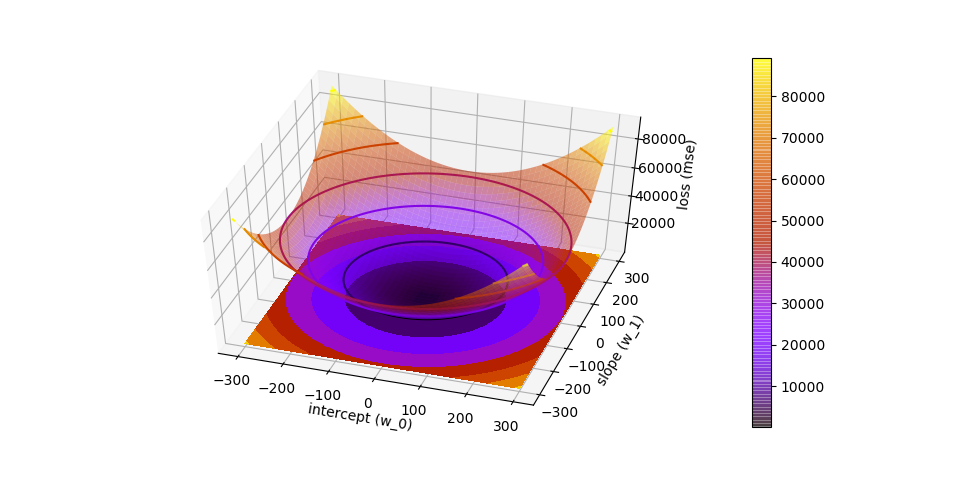

In [18]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = plt.subplot(111, projection='3d')
ax.set(xlabel='intercept (w_0)', ylabel='slope (w_1)', zlabel='loss (mse)')

surface = ax.plot_surface(xx,yy,zz,cmap=plt.cm.gnuplot, alpha=0.5)
fig.colorbar(surface)

# this is for contour plot on the xy plane
ax.contourf(xx,yy,zz, zdir='z', offset=500 ,cmap=plt.cm.gnuplot)
# this is normal contour lines in 3d space
ax.contour(xx, yy, zz, cmap=plt.cm.gnuplot)

# this is just to set the default view (angle and elevation) of our 3d plot.
ax.view_init(azim=-72, elev=50)
plt.show()

- Our optimisation function is purely ___convex function___. So there will be onlly __one minima__ and it is ___GLOBAL MINIMA___.
- So we can apply __Gradient Descent__ to find out the where the minimum value is..
- The __minimum__ lies in __darkest place in the 3d plot__. We will apparoximate this using Gradient Descent

## Gradient Descent function to get Next Best weight vector

In [21]:
iterations = 6000
learning_rate = 0.01

In [22]:
x.shape, w.shape, x.T.shape, (x.dot(w)-y).shape

((75, 2), (2, 1), (2, 75), (75, 1))

In [23]:
def gradientDescent(x, y, w, iterations, learning_rate):
    n = len(y) # no of data points
    
    # to store the error for each iteration
    errors = list() 
    weights = list()
    
    # add initial weights and error(mse) with that initial weights
    weights.append(w)
    errors.append(compute_cost(w, x, y))
       
    # for each iteration, update weights and store these weighs and error.
    for i in range(iterations):
        wx = x.dot(w)
        change_in_weights = (1/n)*(np.dot(x.T, wx-y))
        w = w - learning_rate*change_in_weights
        
        # add updated weight vector to the list and error
        weights.append(w)
        # add error to the errors with updated weights
        errors.append(compute_cost(w,x,y))
    
    return weights, errors

In [24]:
weights, costs = gradientDescent(x, y, w, iterations, learning_rate)

<IPython.core.display.Javascript object>


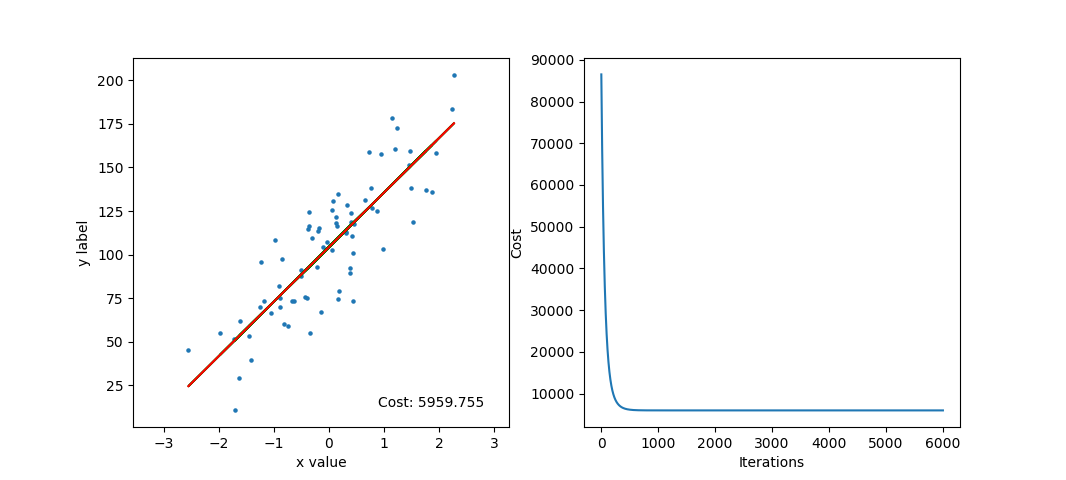

In [25]:
fig= plt.figure(figsize=plt.figaspect(0.45))

ax1 = plt.subplot(121)
ax1.set(xlabel='x value', ylabel='y label')
ax1.scatter(x[:,-1],y,s=5)
ax1.set(xlim = [min_x-1, max_x+1],
      ylim = [min_y-10, max_y+10])

# add the line wih final weights slope and intercept
ln = create_line(weights=weights[-1],x_values=[min_x, max_x])
ax1.add_artist(ln)

# our regression line from sklearn
ax1.plot(x[:, -1],y_pred, c='g')

# mean squared error
cost = compute_cost(weights[-1],x,y)
an = annotate_cost(cost, ax1)


ax2 = plt.subplot(122)
ax2.plot(range(iterations+1), costs)
ax2.set(xlabel='Iterations', ylabel='Cost')
# we can even change the text of the annotation if you want to.
# an.set_text('adfeadf')
# ax2.annotate_co
plt.show()

In [26]:
# intercept and slope with SK-learn implementation
print(reg.intercept_, reg.coef_[0])

# the weights that we got after running the algorithm for certain no of iterations
weights[-1]

104.333045187 31.3255563526


array([[ 104.33304519],
       [  31.32555635]])

# animating how the line adjusts with the interations

In [27]:
#import animation and rc module from matplotlub
from matplotlib import animation, rc
from IPython.display import HTML

# this is used to display the animation inline with html controls
rc('animation', html='html5')

In [28]:
X.shape, y.shape

((75, 1), (75, 1))

## testing how to draw the 3d points on the surface of the function

In [29]:
xs, ys, zs = list(), list(), list()
for weight in weights:
    intercept, slope = weight.flatten()
    xs.append(intercept)
    ys.append(slope)
    zs.append(compute_cost(weight, x, y))

<IPython.core.display.Javascript object>


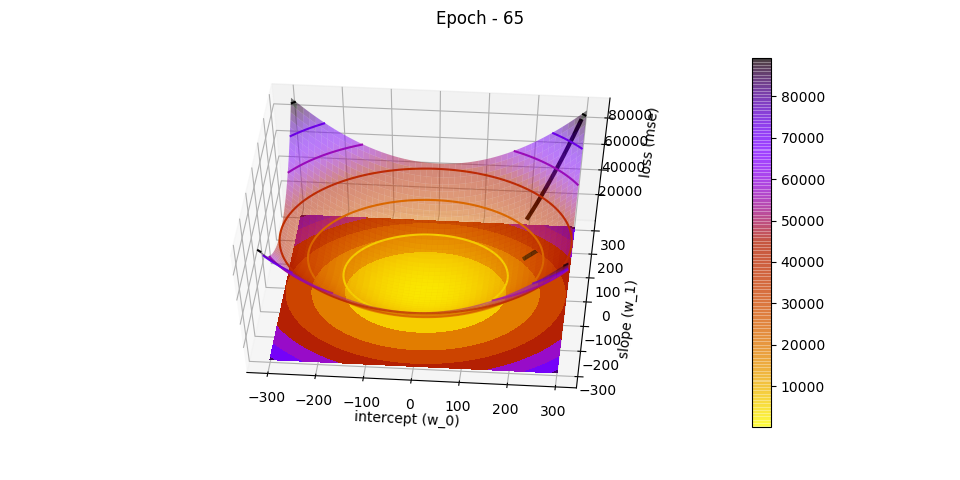

In [32]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = plt.subplot(111, projection='3d')
ax.set(xlabel='intercept (w_0)', ylabel='slope (w_1)', zlabel='loss (mse)')

surface = ax.plot_surface(xx,yy,zz,cmap=plt.cm.gnuplot_r, alpha=0.5)
fig.colorbar(surface)
# this is for contour plot on the xy plane
ax.contourf(xx,yy,zz, zdir='z', offset=500 ,cmap=plt.cm.gnuplot_r)
# this is normal contour lines in 3d space
ax.contour(xx, yy, zz, cmap=plt.cm.gnuplot_r)
# this is just to set the default view (angle and elevation) of our 3d plot.
ax.view_init(azim=-85, elev=55)


line_3d, = ax.plot3D([], [], [], color='k', linewidth=3)
line_2d, = ax.plot([], [], color='k', linewidth=3) 

# it will be called before every frame updation, if blit is set to True
def init():
    line_3d.set_data([], [])
    line_3d.set_3d_properties([])
    
    line_2d.set_data([],[])
    line_2d.set_3d_properties([])
    return (line_3d, line_2d)

def update_plot(frame_no):
    fig.suptitle('Epoch - {}'.format(frame_no))
    line_3d.set_data(xs[:frame_no+1], ys[:frame_no+1])
    line_3d.set_3d_properties(zs[:frame_no+1])
    
    line_2d.set_data(xs[:frame_no+1], ys[:frame_no+1])
    line_2d.set_3d_properties([0]*(frame_no+1))
    return (line_3d, line_2d)
    

# try to add points to the plot
# ax.plot3D(xs, ys, zs, color='k', linewidth=3)

# plot the line in xy plane ie., on the contour plot
# ax.plot(xs, ys, color='k', linewidth=3)

anim = animation.FuncAnimation(fig, update_plot, frames=500, interval=20, init_func=init,blit=True)

plt.show()

In [436]:
anim

<IPython.core.display.Javascript object>


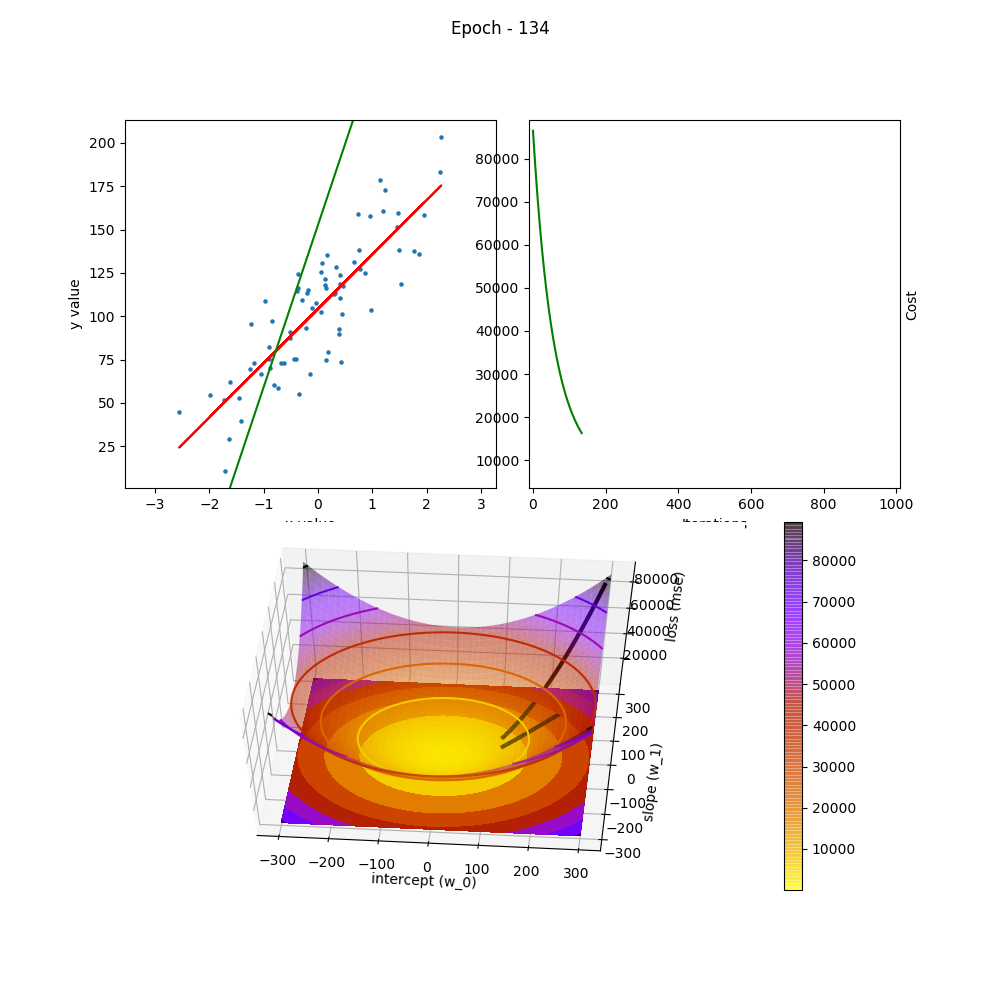

In [42]:
fig = plt.figure(figsize=(10,10))

# plot to show the regression line animation...
regplot = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2)
# add points and regression line from sklearn algorithm
regplot.scatter(X, y, s=5)
regplot.set(xlim=[X.min()-1, X.max()+1], ylim=[y.min()-10, y.max()+10],
           xlabel='x value', ylabel='y value')
# add the sklearn regression line to the plot in red. 
regplot.plot(x[:, -1],y_pred, c='r')
# line which should be updated with each frame
reg_line,  = regplot.plot([], [], color='g')

# this is to plot how cost is decresing with each iteration
costplot =  plt.subplot2grid((4, 4), (0, 2), colspan=2, rowspan=2)
costplot.set(xlabel='Iterations', ylabel='Cost',
            xlim=[-10, 1000+10], ylim=[min(costs)-2500, max(costs)+2500])
costplot.yaxis.set_label_position('right')
cost_line, = costplot.plot([], [], color='g')
# an

# this is for 3d plot to show how our function reaching minimum value
# ie., to show how gradient descent is working in 3d plot of our cost function.
convex_cost_plot = plt.subplot2grid((4, 4), (2, 0), colspan=4, rowspan=2, projection='3d')
convex_cost_plot.set(xlabel='intercept (w_0)', ylabel='slope (w_1)', zlabel='loss (mse)')
# plot the surface 
surface = convex_cost_plot.plot_surface(xx,yy,zz,cmap=plt.cm.gnuplot_r, alpha=0.5)
fig.colorbar(surface)
# this is for contour plot on the xy plane
convex_cost_plot.contourf(xx,yy,zz, zdir='z', offset=500 ,cmap=plt.cm.gnuplot_r)
# this is normal contour lines in 3d space
convex_cost_plot.contour(xx, yy, zz, cmap=plt.cm.gnuplot_r)
# this is just to set the default view (angle and elevation) of our 3d plot.
convex_cost_plot.view_init(azim=-85, elev=55)

# prepare 2d and 3d line to show how we will found our the minimum value.
line_3d, = convex_cost_plot.plot3D([], [], [], color='k', linewidth=3)
line_2d, = convex_cost_plot.plot([], [], color='k', linewidth=3) 


# it will be called before every frame updation, if blit is set to True
def init():
    # clearing the previous regression line.
    reg_line.set_data([], [])
    # clearing the previous cost line.
    cost_line.set_data([], [])
    # clearing lines in 3d plot.
    line_3d.set_data([], [])
    line_3d.set_3d_properties([])
    line_2d.set_data([],[])
    line_2d.set_3d_properties([])
    return (reg_line, cost_line, line_3d, line_2d)


# function to update the subplots
def update_plot(frame_no, x_values):
    fig.suptitle('Epoch - {}'.format(frame_no))
    # update the regression line
    intercept, slope = np.array(weights[frame_no]).flatten()
    y_values = intercept + np.array(x_values)*slope
    reg_line.set_data(x_values, y_values)
    
    # update the cost line
    cost_line.set_data(list(range(frame_no+1)), costs[:frame_no+1])
    
    line_3d.set_data(xs[:frame_no+1], ys[:frame_no+1])
    line_3d.set_3d_properties(zs[:frame_no+1])
    
    line_2d.set_data(xs[:frame_no+1], ys[:frame_no+1])
    line_2d.set_3d_properties([0]*(frame_no+1))
    return (reg_line, cost_line, line_3d, line_2d)


anim = animation.FuncAnimation(fig, update_plot, fargs=[[min_x, max_x]],init_func=init,
                               frames=1000, interval=20, blit=True)

plt.show()

In [38]:
anim

<IPython.core.display.Javascript object>


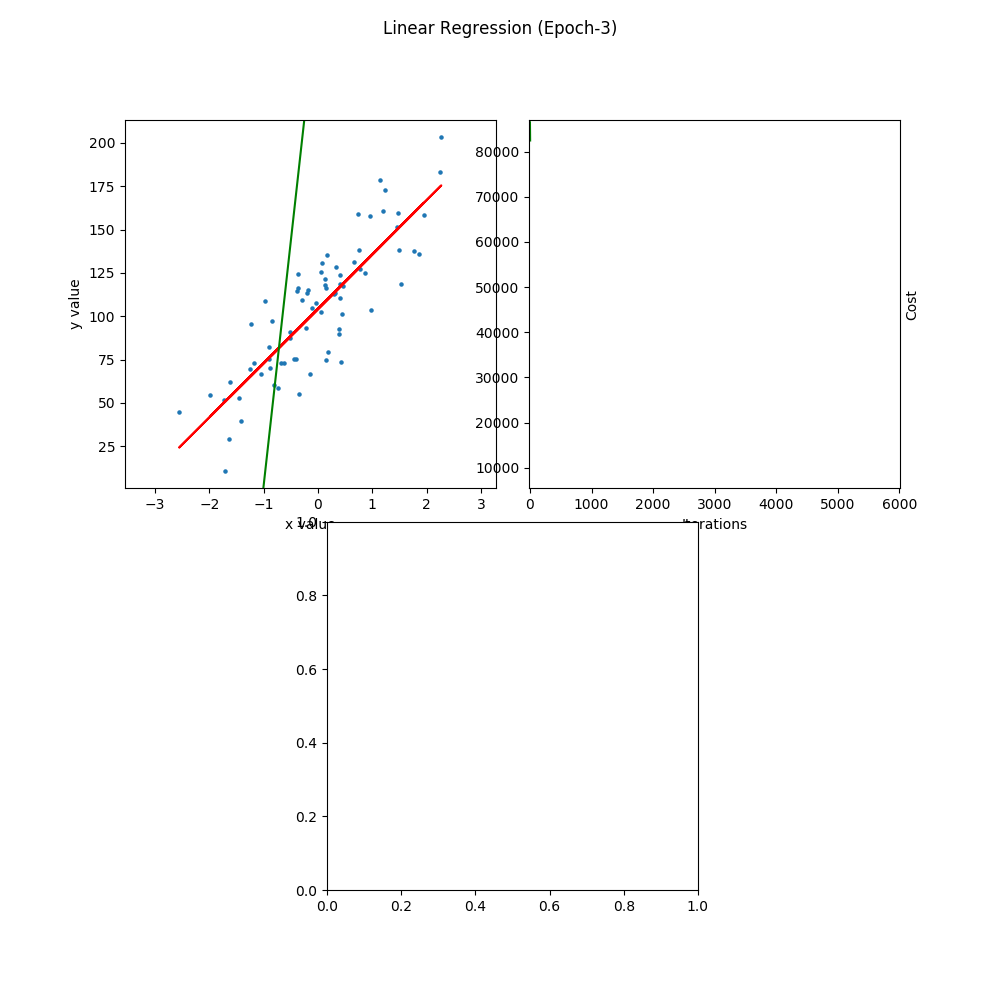

In [43]:
# prepare the figure for the animation
fig = plt.figure(figsize=(10,10))

# plot with points and regression line from sklearn algorithm
regplot = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2)
regplot.scatter(X, y, s=5)
regplot.set(xlim=[X.min()-1, X.max()+1], ylim=[y.min()-10, y.max()+10],
           xlabel='x value', ylabel='y value')
# add the sklearn regression line to the plot in red. 
regplot.plot(x[:, -1],y_pred, c='r')
# line which should be updated with each frame
reg_line,  = regplot.plot([], [], color='g')


# this is to plot how cost is decresing with each iteration
costplot =  plt.subplot2grid((4, 4), (0, 2), colspan=2, rowspan=2)
costplot.set(xlabel='Iterations', ylabel='Cost',
            xlim=[-10, iterations+10], ylim=[min(costs)-500, max(costs)+500])
costplot.yaxis.set_label_position('right')
cost_line, = costplot.plot([], [], color='g')
ann = costplot.annotate('', xy=[])

# this is for 3d plot to show how our function reaching minimum value
convex_cost_plot = plt.subplot2grid((4, 4), (2, 1), colspan=2, rowspan=2)



# function that will be called before updating each frame when blit is True.
# Otherwise, it is called only once, at the beginning
def init():
    reg_line.set_data([], [])
    cost_line.set_data([], [])
    return (reg_line, cost_line)

# function to update the subplots
def update(frame_no, x_values):
    fig.suptitle('Linear Regression (Epoch-{})'.format(frame_no))
    # update the regression line
    intercept, slope = np.array(weights[frame_no]).flatten()
    y_values = intercept + np.array(x_values)*slope
    reg_line.set_data(x_values, y_values)
    
    # update the cost line
    cost_line.set_data(list(range(frame_no+1)), costs[:frame_no+1])
    return (reg_line, cost_line)
    

    
anim = animation.FuncAnimation(fig, update, fargs=[[min_x, max_x]],
                               init_func=init, frames=100, blit=True, interval=20)
# plt.close()
plt.show()


In [415]:
anim

Incase the video doesn't work (in some browsers like opera), just remove plt.close() and run plt.show()

In [35]:
plt.show()

## sample code to draw just lines without redrawing the entire plot

In [ ]:
# create temp directory if not present..
directory = 'temp'
create_dir(directory)


# create figure with all the datapoints on the plot
fig,ax = plt.subplots()
ax.scatter(X,y,s = 5)
ax.set(xlim=[min_x-1, max_x+1],
       ylim=[min_y-10, max_y+10])

# add the first line (given slope and y_intercept) to the plot, save figure
x_temp = np.array([min_x, max_x])
ln = create_line([100, 40],x_values=x_temp, c='g')
ax.add_artist(ln)
fig.savefig(directory+'/1.png')
# ln.remove()

# after remoing old line, add new green line and save the fig with green line.
ln = create_line([100,50], x_temp, c='k')
ax.add_artist(ln)
fig.savefig(directory+'/2.png')
# ln.remove()

ln = create_line([100,60],x_temp, c='m')
ax.add_artist(ln)
fig.savefig(directory+'/3.png')

ln = create_line([180,0],x_temp)
ax.add_artist(ln)
fig.savefig(directory+'/3.png')

plt.show()